In [1]:
import sys
import pandas
import numpy
import seaborn
import scipy
import sklearn
import matplotlib

In [2]:
print('Python:{}'.format(sys.version))
print('Numpy:{}'.format(numpy.__version__))

Python:3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy:1.15.4


In [3]:
import tensorflow as tf

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
#load data set from the csv file
data = pd.read_csv("data/train_2v.csv",sep=",")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [6]:
from sklearn.preprocessing import Imputer

In [7]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
#select_dtypes function can be used to build a new dataframe containing only the object columns.
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
1,Male,Yes,Private,Urban,never smoked
2,Female,No,Private,Urban,NaN
3,Female,Yes,Private,Rural,formerly smoked
4,Male,No,Never_worked,Rural,NaN


In [9]:
data['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

In [10]:
data['work_type'].value_counts()

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64

In [12]:
# to have a bar plot that shows how many of this category have stroke and the number who do not.

In [13]:
#Before going any further, there are a couple of null values in the data that we need to clean up. 
#let's see only rows which have values Nan in their columns.
obj_data[obj_data.isnull().any(axis=1)]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,No,children,Rural,NaN
2,Female,No,Private,Urban,NaN
4,Male,No,Never_worked,Rural,NaN
5,Female,Yes,Private,Urban,NaN
10,Female,Yes,Govt_job,Urban,NaN
20,Female,Yes,Private,Rural,NaN
30,Male,Yes,Self-employed,Urban,NaN
31,Female,Yes,Private,Urban,NaN
33,Female,No,children,Urban,NaN
34,Female,Yes,Private,Urban,NaN


In [14]:
# lets the column with Nan values be categrised.
obj_data["smoking_status"].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [15]:
#For the sake of simplicity, just fill in the value with the "never smoked" (since that is the most common value.
# but we do not do this, because this is an important feature and it is better 2 dataframe with and without these rows that han nan values.
# so if we wanna replace that not recommend , with below command is possible.
#obj_data = obj_data.fillna({"smoking_status":"never smoked"})

In [16]:
#For the sake of simplicity, just fill in the value with the "never smoked" (since that is the most common value):
obj_data = obj_data.fillna({"smoking_status":"never smoked"})

In [17]:
obj_data.head

<bound method NDFrame.head of        gender ever_married      work_type Residence_type   smoking_status
0        Male           No       children          Rural     never smoked
1        Male          Yes        Private          Urban     never smoked
2      Female           No        Private          Urban     never smoked
3      Female          Yes        Private          Rural  formerly smoked
4        Male           No   Never_worked          Rural     never smoked
5      Female          Yes        Private          Urban     never smoked
6      Female          Yes        Private          Urban  formerly smoked
7      Female          Yes  Self-employed          Rural     never smoked
8      Female          Yes        Private          Rural           smokes
9      Female          Yes  Self-employed          Urban     never smoked
10     Female          Yes       Govt_job          Urban     never smoked
11       Male          Yes        Private          Urban  formerly smoked
12     F

In [18]:
#Now that the data does not have any null values, we can look at options for encoding the categorical values.

#Approach #2 - Label Encoding:  One trick you can use in pandas is to convert a column to a category,
#then use those category values for your label encoding:
#data['work_type'].value_counts()



In [19]:
obj_data["smoking_status"] = obj_data["smoking_status"].astype('category')
obj_data.dtypes

gender              object
ever_married        object
work_type           object
Residence_type      object
smoking_status    category
dtype: object

In [20]:
#Then you can assign the encoded variable to a new column using the cat.codes accessor:
obj_data["smoking_status_cat"] = obj_data["smoking_status"].cat.codes
obj_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,smoking_status_cat
0,Male,No,children,Rural,never smoked,1
1,Male,Yes,Private,Urban,never smoked,1
2,Female,No,Private,Urban,never smoked,1
3,Female,Yes,Private,Rural,formerly smoked,0
4,Male,No,Never_worked,Rural,never smoked,1


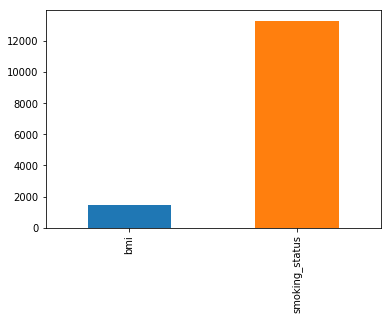

In [21]:
#to see missing values
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [22]:
obj_data["Residence_type"] = obj_data["Residence_type"].astype('category')
obj_data["Residence_type_cat"] = obj_data["Residence_type"].cat.codes
obj_data.head()

,gender,ever_married,work_type,Residence_type,smoking_status,smoking_status_cat,Residence_type_cat
0,Male,No,children,Rural,never smoked,1,0
1,Male,Yes,Private,Urban,never smoked,1,1
2,Female,No,Private,Urban,never smoked,1,1
3,Female,Yes,Private,Rural,formerly smoked,0,0
4,Male,No,Never_worked,Rural,never smoked,1,0


In [23]:
#deleting the features Residence_type 
obj_data.drop(['Residence_type'], axis=1, inplace=True)

In [24]:
obj_data.head()

,gender,ever_married,work_type,smoking_status,smoking_status_cat,Residence_type_cat
0,Male,No,children,never smoked,1,0
1,Male,Yes,Private,never smoked,1,1
2,Female,No,Private,never smoked,1,1
3,Female,Yes,Private,formerly smoked,0,0
4,Male,No,Never_worked,never smoked,1,0


In [25]:
obj_data["ever_married"] = obj_data["ever_married"].astype('category')
obj_data["ever_married_cat"] = obj_data["ever_married"].cat.codes
obj_data.head()

,gender,ever_married,work_type,smoking_status,smoking_status_cat,Residence_type_cat,ever_married_cat
0,Male,No,children,never smoked,1,0,0
1,Male,Yes,Private,never smoked,1,1,1
2,Female,No,Private,never smoked,1,1,0
3,Female,Yes,Private,formerly smoked,0,0,1
4,Male,No,Never_worked,never smoked,1,0,0


In [26]:
#deleting the features  
obj_data.drop(['ever_married'], axis=1, inplace=True)

In [27]:
result=obj_data

In [28]:
obj_data["gender"] = obj_data["gender"].astype('category')
obj_data["gender_cat"] = obj_data["gender"].cat.codes



In [29]:
obj_data["work_type"] = obj_data["work_type"].astype('category')
obj_data["work_type_cat"] = obj_data["work_type"].cat.codes

In [30]:
#deleting the features  
obj_data.drop(['work_type'], axis=1, inplace=True)
obj_data.drop(['gender'], axis=1, inplace=True)
obj_data.drop(['smoking_status'], axis=1, inplace=True)

In [31]:
data['bmi'].fillna((data['bmi'].mean()), inplace=True)

In [32]:
#select_dtypes function can be used to build a new dataframe containing only the int64 and float64 columns.
data2 = data.select_dtypes(exclude=['object']).copy()




In [33]:
result1=obj_data
result1=pd.concat([result1,data2],axis=1,sort=False)
# result is numeric only some features, and obj_data is numerical convereted features.
# and result1 is the concatenate of all features....means all of them is numerical. 

In [34]:
result1.head()

,smoking_status_cat,Residence_type_cat,ever_married_cat,gender_cat,work_type_cat,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,0,1,4,30669,3.0,0,0,95.12,18.0,0
1,1,1,1,1,2,30468,58.0,1,0,87.96,39.2,0
2,1,1,0,0,2,16523,8.0,0,0,110.89,17.6,0
3,0,0,1,0,2,56543,70.0,0,0,69.04,35.9,0
4,1,0,0,1,1,46136,14.0,0,0,161.28,19.1,0


In [35]:
# relation of bmi and stroke
#relation of gloucoze level and bmi

In [36]:
#Checking of Linearity
from pandas import DataFrame
import matplotlib.pyplot as plt

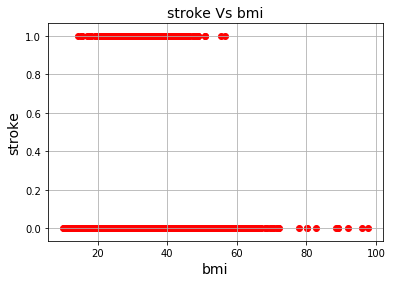

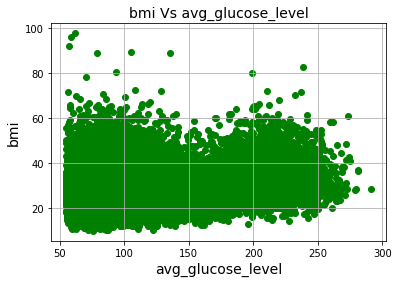

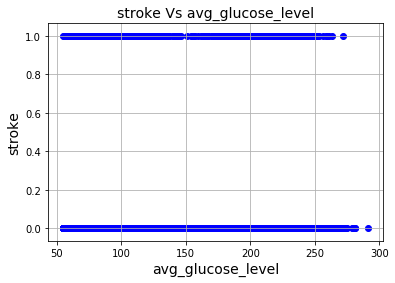

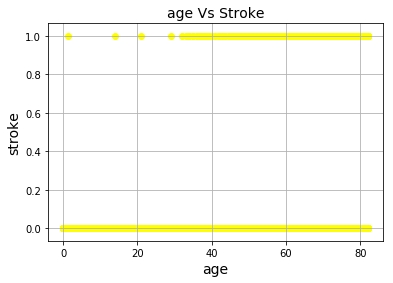

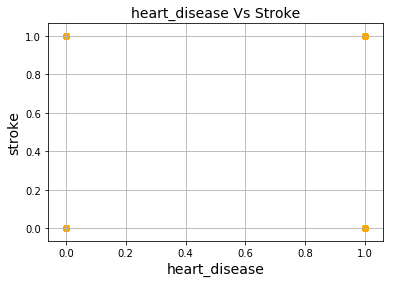

In [37]:
df = DataFrame(result1,columns=['bmi','avg_glucose_level','stroke', 'age','heart_disease','hypertension'])
 
plt.scatter(df['bmi'], df['stroke'], color='red')
plt.title('stroke Vs bmi', fontsize=14)
plt.xlabel('bmi', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['avg_glucose_level'], df['bmi'], color='green')
plt.title('bmi Vs avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=14)
plt.ylabel('bmi', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['avg_glucose_level'], df['stroke'], color='blue')
plt.title('stroke Vs avg_glucose_level', fontsize=14)
plt.xlabel('avg_glucose_level', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['age'], df['stroke'], color='yellow')
plt.title('age Vs Stroke', fontsize=14)
plt.xlabel('age', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()


plt.scatter(df['heart_disease'], df['stroke'], color='orange')
plt.title('heart_disease Vs Stroke', fontsize=14)
plt.xlabel('heart_disease', fontsize=14)
plt.ylabel('stroke', fontsize=14)
plt.grid(True)
plt.show()


# how can I show the relation ship between multiple features, for example 




In [38]:
# As we can see above, there is no linear relationship in these cases:

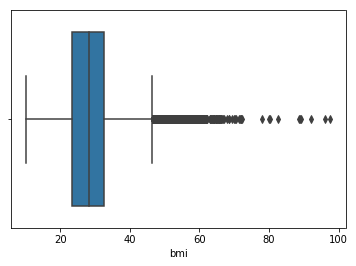

In [39]:
# check for outliers
import seaborn as sns
sns.boxplot(x=result1['bmi'])

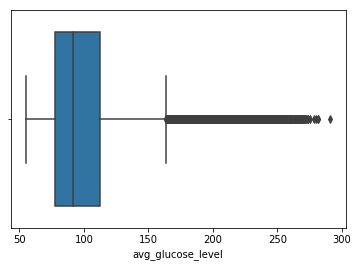

In [40]:
# check for outliers
import seaborn as sns
sns.boxplot(x=result1['avg_glucose_level'])

In [41]:
result1

,smoking_status_cat,Residence_type_cat,ever_married_cat,gender_cat,work_type_cat,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,0,0,1,4,30669,3.0,0,0,95.12,18.000000,0
1,1,1,1,1,2,30468,58.0,1,0,87.96,39.200000,0
2,1,1,0,0,2,16523,8.0,0,0,110.89,17.600000,0
3,0,0,1,0,2,56543,70.0,0,0,69.04,35.900000,0
4,1,0,0,1,1,46136,14.0,0,0,161.28,19.100000,0
5,1,1,1,0,2,32257,47.0,0,0,210.95,50.100000,0
6,0,1,1,0,2,52800,52.0,0,0,77.59,17.700000,0
7,1,0,1,0,3,41413,75.0,0,1,243.53,27.000000,0
8,2,0,1,0,2,15266,32.0,0,0,77.67,32.300000,0
9,1,1,1,0,3,28674,74.0,1,0,205.84,54.600000,0


In [42]:
# to see where stroke is 1
result1[result1.stroke==1] 

,smoking_status_cat,Residence_type_cat,ever_married_cat,gender_cat,work_type_cat,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
63,0,1,1,1,2,9046,67.0,0,1,228.69,36.600000,1
81,1,0,1,0,3,51676,61.0,0,0,202.21,28.605038,1
141,1,0,1,1,2,31112,80.0,0,1,105.92,32.500000,1
257,2,1,1,0,2,60182,49.0,0,0,171.23,34.400000,1
264,1,0,1,0,3,1665,79.0,1,0,174.12,24.000000,1
288,0,1,1,1,2,56669,81.0,0,0,186.21,29.000000,1
291,1,0,1,1,2,53882,74.0,1,1,70.09,27.400000,1
320,1,1,0,0,2,10434,69.0,0,0,94.39,22.800000,1
407,1,0,1,0,2,27419,59.0,0,0,76.15,28.605038,1
426,1,1,1,0,2,60491,78.0,0,0,58.57,24.200000,1


In [43]:
#from 43400 samples only 783 row suffered from stroke

In [46]:
result2=obj_data
result2=pd.concat([result2,data2],axis=1,sort=False)
#stroke should be the last row

In [47]:
# Importing the dataset

x = result2.iloc[:, :-1].values
y = result2.iloc[:, -1].values



In [48]:
# Spliting
from sklearn.model_selection import train_test_split
xtrn, xtes, ytrn, ytes = train_test_split(x, y, test_size=0.2, random_state=123)



In [49]:
# Scaling
from sklearn.preprocessing import StandardScaler
xsc = StandardScaler()
xtrn = xsc.fit_transform(xtrn)
xtes = xsc.transform(xtes)

In [50]:
# Dimensionality reduce
# Reduce to 2 factors (include 54.92% of total according to explain variable)
# Use 2 factors instead of 3 to be able to visualize in 2 dimensions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xtrn = pca.fit_transform(xtrn)
xtes = pca.transform(xtes)
# Set new variable to explain percentage of components
explain = pca.explained_variance_ratio_



In [51]:
# Fitting model
# Apply on SVM classification
from sklearn.svm import SVC
classifier = SVC(kernel="linear")
classifier.fit(xtrn, ytrn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
# Predict
ypd = classifier.predict(xtes)



In [53]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
m = confusion_matrix(ytes, ypd)



In [54]:
# Visualizing
from matplotlib.colors import ListedColormap
# Choose data
xst, yst = xtes, ytes
# Create axis
x1, x2 = np.meshgrid(np.arange(start=xst[:, 0].min() - 1, stop=xst[:, 0].max() + 1, step=0.01), 
                     np.arange(start=xst[:, 1].min() - 1, stop=xst[:, 1].max() + 1, step=0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


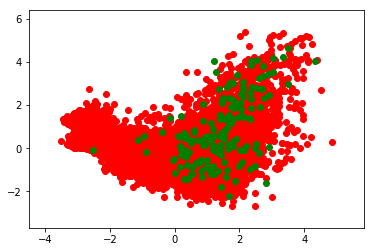

In [55]:
# Create point
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(yst)):
    plt.scatter(xst[yst == j, 0], xst[yst == j, 1],
                c=ListedColormap(("red", "green", "blue"))(i), label=j)